# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [3]:
data = pd.read_csv("data/reviews_sentiment.csv", sep=";")
data.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [5]:
data.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


In [6]:
df = data[["wordcount", "Star Rating", "sentimentValue"]]
df

,wordcount,Star Rating,sentimentValue
0,23,1,-0.486389
1,20,1,-0.586187
2,4,1,-0.602240
3,17,1,-0.616271
4,6,1,-0.651784
...,...,...,...
252,3,5,2.814818
253,1,5,2.924393
254,1,5,2.924393
255,1,5,2.924393


<Axes: ylabel='Count'>

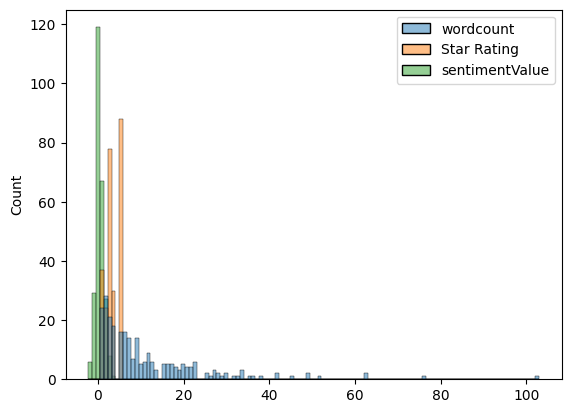

In [7]:
sns.histplot(df)

<Axes: xlabel='sentimentValue', ylabel='Count'>

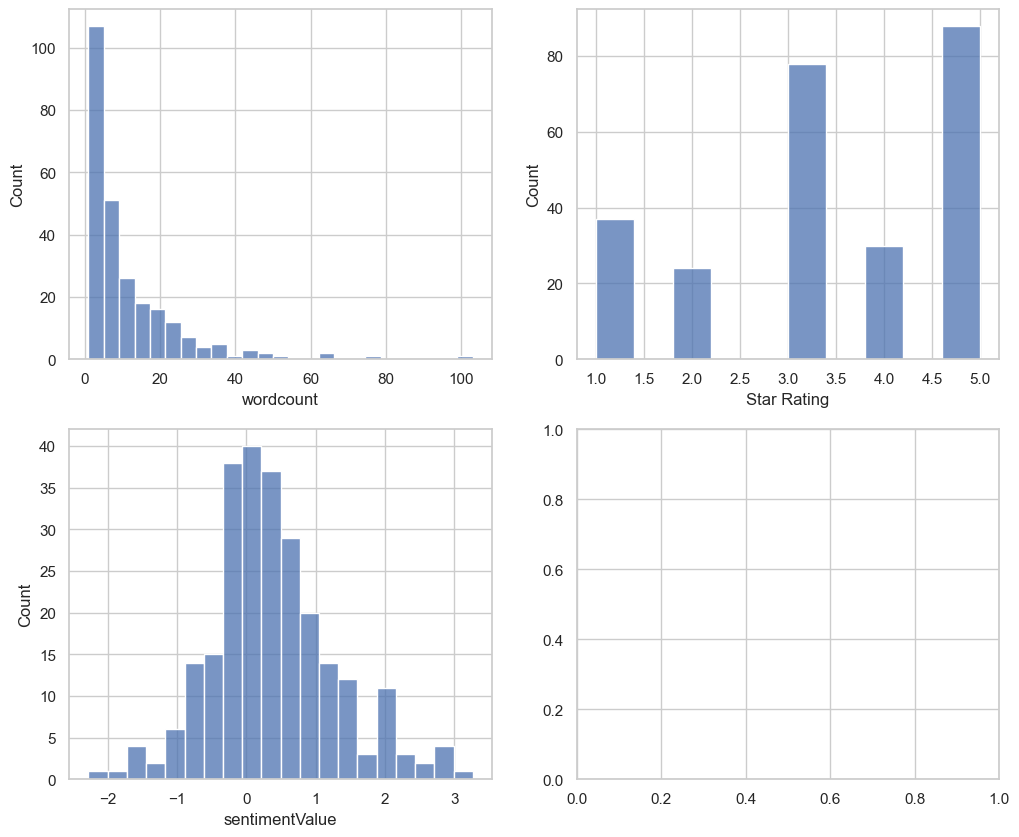

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df["wordcount"],  ax=axs[0, 0], common_norm=False)
sns.histplot(df["Star Rating"],  ax=axs[0, 1], common_norm=False)
sns.histplot(df["sentimentValue"],  ax=axs[1, 0], common_norm=False)


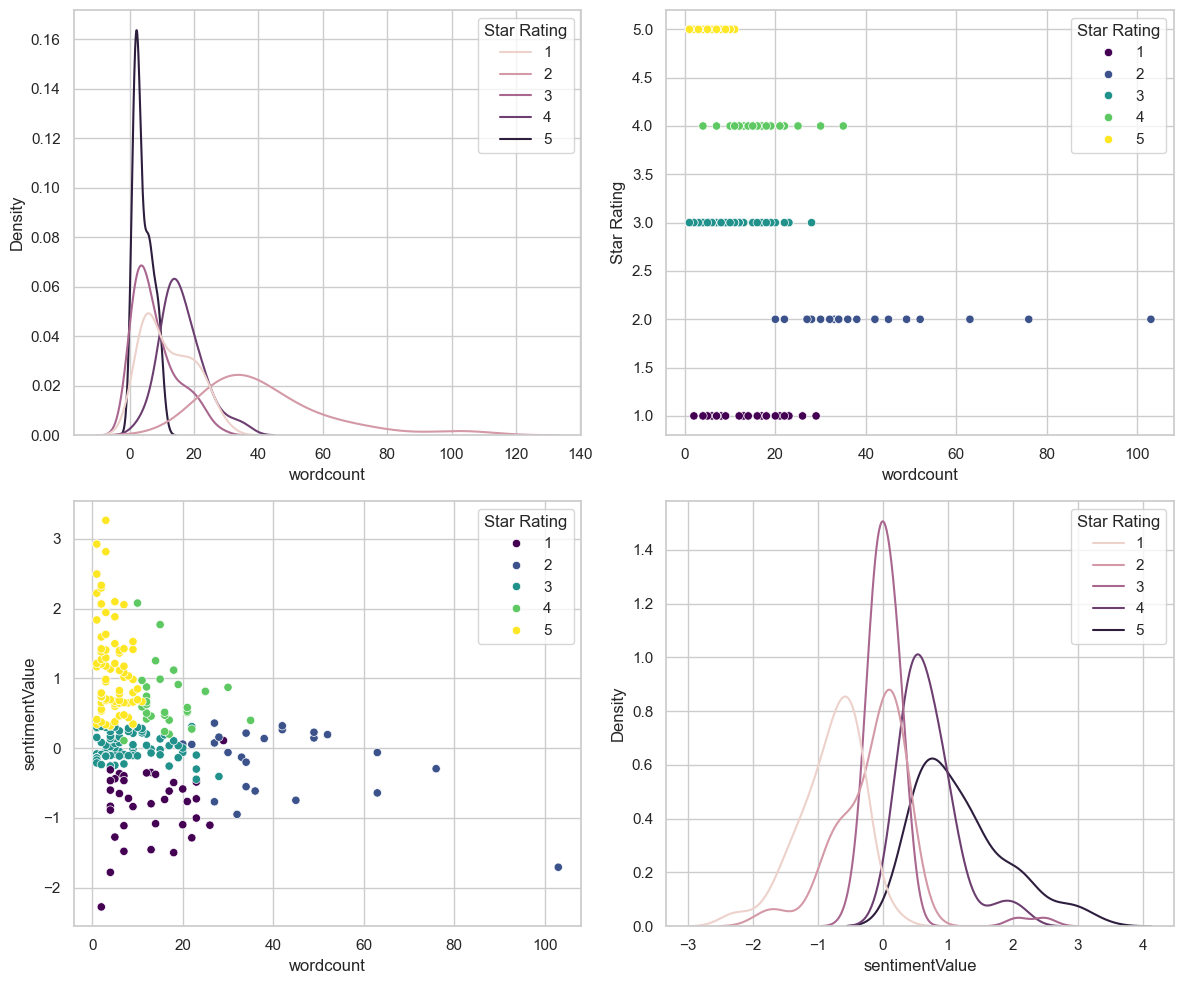

In [14]:

# Configuración de los estilos de los gráficos
sns.set(style="whitegrid")

# Creando la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico superior izquierdo: Densidad de la cantidad de palabras por calificación de estrellas
sns.kdeplot(data=df, x='wordcount', hue='Star Rating', ax=axs[0, 0], common_norm=False)

# Gráfico superior derecho: Dispersión de la cantidad de palabras por calificación de estrellas
sns.scatterplot(data=df, x='wordcount', y='Star Rating', hue='Star Rating', palette='viridis', ax=axs[0, 1])

# Gráfico inferior izquierdo: Dispersión de la cantidad de palabras vs valor de sentimiento
sns.scatterplot(data=df, x='wordcount', y='sentimentValue', hue='Star Rating', palette='viridis', ax=axs[1, 0])

# Gráfico inferior derecho: Densidad del valor de sentimiento por calificación de estrellas
sns.kdeplot(data=df, x='sentimentValue', hue='Star Rating', ax=axs[1, 1], common_norm=False)

# Ajustar la superposición y mostrar el gráfico
plt.tight_layout()
plt.show()


<Figure size 1440x1440 with 0 Axes>

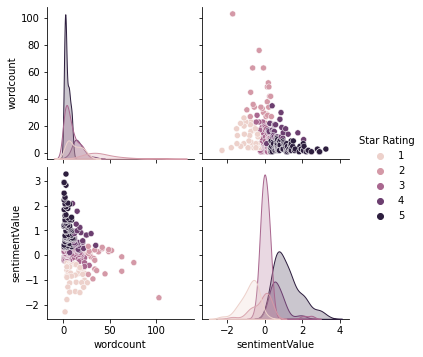

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [25]:
X = df[['wordcount', 'sentimentValue']]
y = df['Star Rating']
X

,wordcount,sentimentValue
0,23,-0.486389
1,20,-0.586187
2,4,-0.602240
3,17,-0.616271
4,6,-0.651784
...,...,...
252,3,2.814818
253,1,2.924393
254,1,2.924393
255,1,2.924393


In [26]:
# Crea el conjunto de features X solo con 'wordcount' y 'sentimentValue' y el conjunto de targe y

# Train/test con test_size = 0.2 y random_state=0

In [64]:
from sklearn.model_selection import train_test_split 

validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=validation_size, random_state=0)


In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


In [66]:
# Valores únicos de y

In [67]:
y.unique()

array([1, 2, 3, 4, 5])

In [68]:
# Los shapes

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


In [70]:
# Mira la documentación de MinMaxScaler y escala los conjuntos X_train, X_test
# Es la misma vaina de siempre, fit del X_train y luego transform del X_train y también del X_test

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [72]:
# Transformar los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Opcional: mostrar las formas de los arrays escalados para confirmar todo está correcto
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(205, 2)
(52, 2)


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento escalados
knn.fit(X_train_scaled, y_train)

# Predecir las etiquetas para los conjuntos de entrenamiento y de prueba
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Calcular el accuracy score para los datos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [83]:
print("Accuracy train ", train_accuracy)
print("Accuracy test ", test_accuracy)

Accuracy train  0.9121951219512195
Accuracy test  0.8269230769230769


## Resultados obtenidos

In [ ]:
# Matriz de confusión del y_test y y_pred

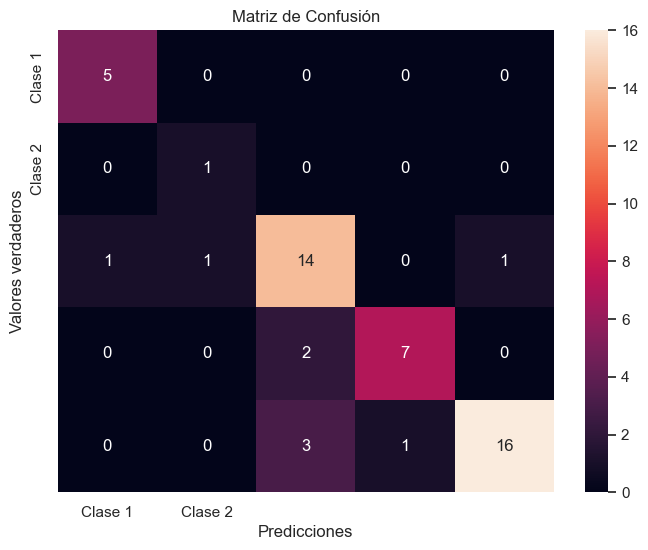

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Clase 1', 'Clase 2'], yticklabels=['Clase 1', 'Clase 2'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [ ]:
# Prueba las k en un rango de 0 a 40 y guarda todos los scores en una lista

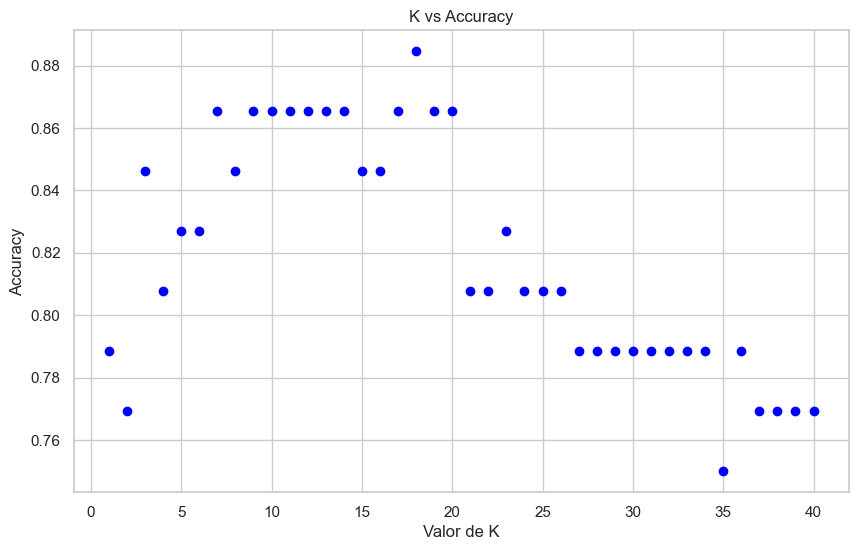

In [86]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Lista para almacenar los scores de accuracy para cada valor de k
accuracies = []

# Probar k desde 1 hasta 40
for k in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 41), accuracies, color='blue')
plt.title('K vs Accuracy')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.xticks(range(0, 41, 5))  # Ajustar los ticks del eje x para mejorar la legibilidad
plt.grid(True)
plt.show()


In [87]:
accuracies

[0.7884615384615384,
 0.7692307692307693,
 0.8461538461538461,
 0.8076923076923077,
 0.8269230769230769,
 0.8269230769230769,
 0.8653846153846154,
 0.8461538461538461,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8461538461538461,
 0.8461538461538461,
 0.8653846153846154,
 0.8846153846153846,
 0.8653846153846154,
 0.8653846153846154,
 0.8076923076923077,
 0.8076923076923077,
 0.8269230769230769,
 0.8076923076923077,
 0.8076923076923077,
 0.8076923076923077,
 0.7884615384615384,
 0.7884615384615384,
 0.7884615384615384,
 0.7884615384615384,
 0.7884615384615384,
 0.7884615384615384,
 0.7884615384615384,
 0.7884615384615384,
 0.75,
 0.7884615384615384,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693]

In [ ]:
# k máximo

In [92]:
(accuracies.index(max(accuracies)) ) + 1

18

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [94]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler

# Instanciar el escalador y ajustar a todos los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Instanciar el modelo de KNeighbors con 18 vecinos como sugerido
knn = KNeighborsClassifier(n_neighbors=18)

# Configurar la validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calcular el score de validación cruzada
cross_val_scores = cross_val_score(knn, X_scaled, y, cv=kf)

# Imprimir el promedio de los scores de validación cruzada
print("Accuracy de validación cruzada:", np.mean(cross_val_scores))


Accuracy de validación cruzada: 0.8487692307692308


In [ ]:
# knn con n_neighbors=18

# KFold de 10 y shuffle = True

In [ ]:
# Esta vez si lo vamos a hacer como toca (sin hacer el train_test_split)

In [95]:
# Datos de la nueva review
new_review = np.array([[5, 1]])

# Escalar los datos de la nueva review usando el mismo escalador
new_review_scaled = scaler.transform(new_review)

# Ajustar el modelo a todos los datos escalados (esto no es lo ideal si los datos son grandes, es solo un ejemplo)
knn.fit(X_scaled, y)

# Hacer la predicción
predicted_rating = knn.predict(new_review_scaled)

print("La predicción de la calificación para la nueva review es:", predicted_rating)


La predicción de la calificación para la nueva review es: [5]


/Users/cescrosello/miniconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Instancia de nuevo una MinMaxScaler() y crea transforma la X

In [51]:
from sklearn.model_selection import cross_val_score, KFold

0.6841538461538462

0.22815031897268362

In [81]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# scaler.fit() # max min 0 1
# scaler.transform() # transform
# scaler.fit_transform() # a la vez

(257, 2)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

{'n_neighbors': 10}

In [85]:
# score

0.8716923076923078